# 1 Examples on SD model building and simulation

In [6]:
!pip install tqdm --user

In [1]:
from ASDM.Engine import Structure
from ASDM.Utilities import plot_time_series
from IPython.display import Image

## Example 1: Goal-gap model

### Functionalities tested:
- Add stock, flow, and auxiliaries to model
- Run simulation and export the result
- Visualise simulation outcome by graph

In [2]:
class GoalGap(Structure):
    def __init__(self):
        super(GoalGap, self).__init__()
        self.add_stock("Stock", 100)
        self.add_aux("Goal", 20)
        self.add_aux("Adjustment_time", 5)
        self.add_aux("Gap", "Goal-Stock")
        self.add_flow("Flow", "Gap/Adjustment_time", flow_to="Stock")

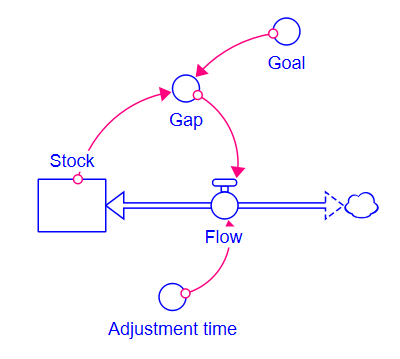

In [3]:
Image('Goal_gap_model.png')

In [7]:
goal_gap_model = GoalGap()
goal_gap_model.clear_last_run()
goal_gap_model.simulate(simulation_time=20, dt=1)
df_goal_gap = goal_gap_model.export_simulation_result()
df_goal_gap

,Stock,Goal,Adjustment time,Gap,Flow
Weeks,,,,,
0.0,100.000000,20.0,5.0,-80.000000,-16.000000
1.0,84.000000,20.0,5.0,-64.000000,-12.800000
2.0,71.200000,20.0,5.0,-51.200000,-10.240000
3.0,60.960000,20.0,5.0,-40.960000,-8.192000
4.0,52.768000,20.0,5.0,-32.768000,-6.553600
5.0,46.214400,20.0,5.0,-26.214400,-5.242880
6.0,40.971520,20.0,5.0,-20.971520,-4.194304
7.0,36.777216,20.0,5.0,-16.777216,-3.355443
8.0,33.421773,20.0,5.0,-13.421773,-2.684355


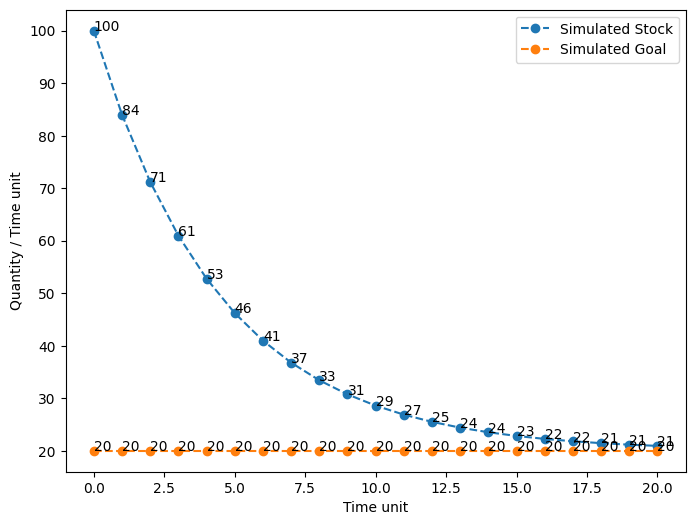

In [8]:
plot_time_series({
    "Stock":{"Simulated": df_goal_gap['Stock']},
    "Goal":{"Simulated": df_goal_gap['Goal']}
}, separate_ax=False)

## Example 2: Patient flow model

#### Functionalities tested:
- Support for non-linear functions such as MIN, MAX, enabled through built-in python functions
- Support for stochastic functions such as random binomial (rbinom), enabled through Scipy

In [9]:
class PatientFlow(Structure):
    def __init__(self):
        super(PatientFlow, self).__init__()
        self.add_stock("Waiting_list", 100)
        self.add_stock("In_hospital", 30)
        self.add_stock("In_community_care", 100)
        
        self.add_aux("Hospital_bed_capacity", 30)
        self.add_aux("Hospital_bed_vacancy", "Hospital_bed_capacity-In_hospital")
        self.add_aux("p_completion", 0.1)
        self.add_aux("p_leaving", 0.1)

        self.add_flow("GP_referrals", 3, flow_to="Waiting_list")
        self.add_flow(
            "Hospital_admission_rate", 
            "MIN(Waiting_list, MAX(Treatment_completion_rate, Hospital_bed_vacancy))",  # mimicing the non-negative stock behaviour
            flow_from="Waiting_list", 
            flow_to="In_hospital"
            )
        self.add_flow(
            "Treatment_completion_rate", 
            "rbinom(In_hospital, p_completion)", 
            flow_from="In_hospital", 
            flow_to="In_community_care"
            )
        self.add_flow(
            "Community_care_leaving_rate", 
            "rbinom(In_community_care, p_leaving)", 
            flow_from="In_community_care"
            )

        # mapping SD functions to Python functions
        self.custom_functions['MAX'] = max
        self.custom_functions['MIN'] = min

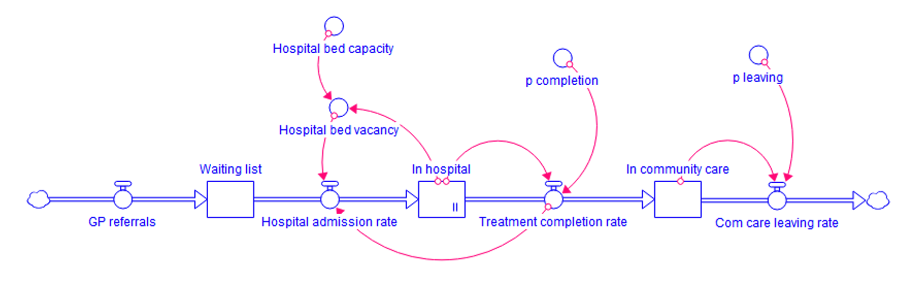

In [10]:
Image('Simplified_patient_flow_model.png')

In [11]:
patient_flow_model = PatientFlow()
patient_flow_model.clear_last_run()
patient_flow_model.simulate(simulation_time=20, dt=1)
df_patient_flow = patient_flow_model.export_simulation_result()
df_patient_flow

,Waiting list,In hospital,In community care,Hospital bed capacity,Hospital bed vacancy,p completion,p leaving,GP referrals,Hospital admission rate,Treatment completion rate,Community care leaving rate
Weeks,,,,,,,,,,,
0.0,100.0,30.0,100.0,30.0,0.0,0.1,0.1,3.0,3.0,3.0,10.0
1.0,100.0,30.0,93.0,30.0,0.0,0.1,0.1,3.0,6.0,6.0,5.0
2.0,97.0,30.0,94.0,30.0,0.0,0.1,0.1,3.0,4.0,4.0,8.0
3.0,96.0,30.0,90.0,30.0,0.0,0.1,0.1,3.0,5.0,5.0,15.0
4.0,94.0,30.0,80.0,30.0,0.0,0.1,0.1,3.0,1.0,1.0,10.0
5.0,96.0,30.0,71.0,30.0,0.0,0.1,0.1,3.0,5.0,5.0,3.0
6.0,94.0,30.0,73.0,30.0,0.0,0.1,0.1,3.0,4.0,4.0,5.0
7.0,93.0,30.0,72.0,30.0,0.0,0.1,0.1,3.0,2.0,2.0,12.0
8.0,94.0,30.0,62.0,30.0,0.0,0.1,0.1,3.0,2.0,2.0,5.0


In [14]:
df_patient_flow.columns

Index(['Waiting list', 'In hospital', 'In community care',
       'Hospital bed capacity', 'Hospital bed vacancy', 'p completion',
       'p leaving', 'GP referrals', 'Hospital admission rate',
       'Treatment completion rate', 'Community care leaving rate'],
      dtype='object')

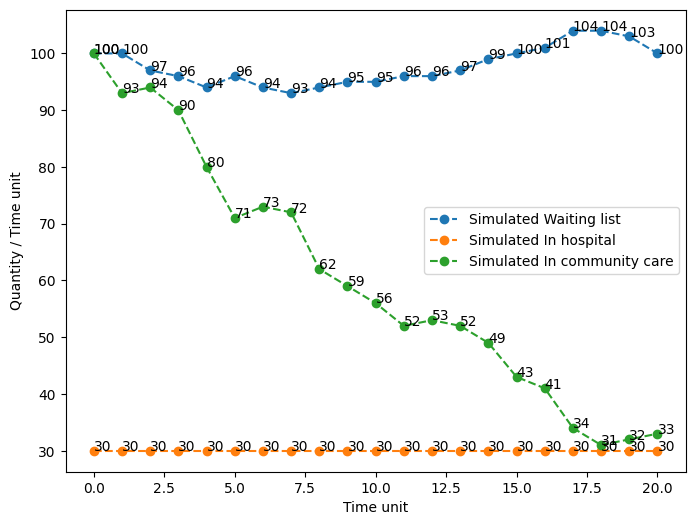

In [15]:
# MF : removed underscore from variables
plot_time_series({
    "Waiting list": {"Simulated": df_patient_flow['Waiting list']},
    "In hospital": {"Simulated": df_patient_flow['In hospital']},
    "In community care": {"Simulated": df_patient_flow['In community care']}
    }, separate_ax=False)

In [ ]:
from scipy import stats

In [ ]:
stats.binom.rvs(int(10), 0.3, size=1)[0]